In [7]:
import cv2, matplotlib
import numpy as np
from matplotlib import pyplot as plt
matplotlib.rcParams['figure.figsize'] = (20.0, 10.0)

In [8]:
img = cv2.imread('many-people.jpg',0)
img2 = img.copy()
template = cv2.imread('template.png',0)
w, h = template.shape[::-1]

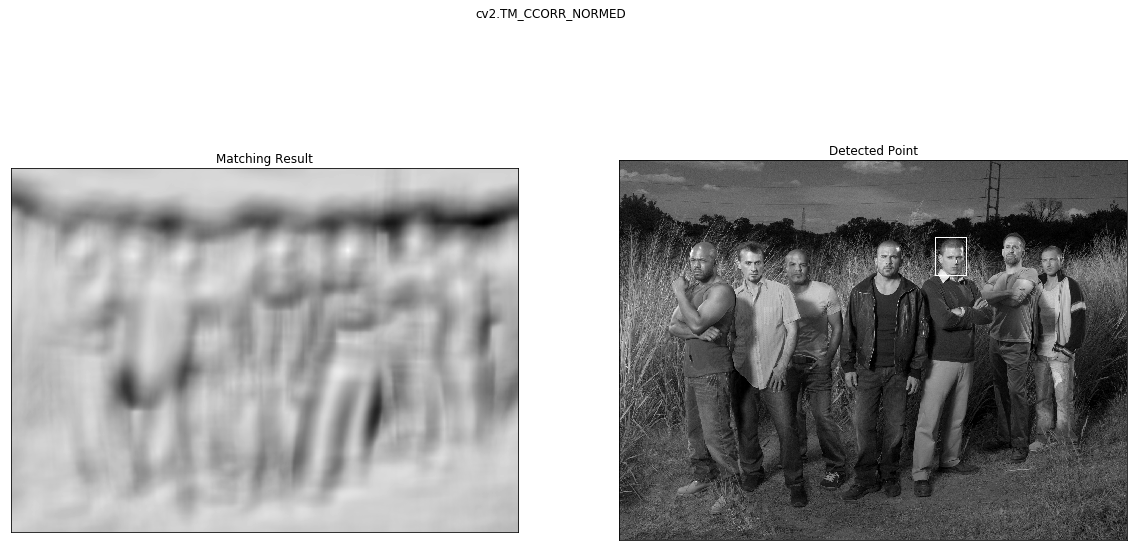

In [11]:

# the method for comparison in a list
meth = 'cv2.TM_CCORR_NORMED'
img = img2.copy()
method = eval(meth)

# Apply template Matching
res = cv2.matchTemplate(img,template,method)
min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)

# If the method is TM_SQDIFF or TM_SQDIFF_NORMED, take minimum
if method in [cv2.TM_SQDIFF, cv2.TM_SQDIFF_NORMED]:
    top_left = min_loc
else:
    top_left = max_loc
bottom_right = (top_left[0] + w, top_left[1] + h)

cv2.rectangle(img,top_left, bottom_right, 255, 2)

plt.subplot(121),plt.imshow(res,cmap = 'gray')
plt.title('Matching Result'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(img,cmap = 'gray')
plt.title('Detected Point'), plt.xticks([]), plt.yticks([])
plt.suptitle(meth)

plt.show()
